# Image Processing 2 - Morphological ops 

    علي ناصر الدين علي السيد الحملاوي 1400842
    عبد الله علي السيد محمد فتيح 1400804

## 1- Documentation

This notebook is to apply some of Morphological operations and apply some applications by this operations
below is a description of all operations independently, all image that i have used is in this folder
https://drive.google.com/drive/folders/1BmP-NdXTfCwzo-kraUdax2Nff_JcTKFB
, make sure you have : your mind, your coffie and the images 

## 2-Setup

In [1]:
import cv2
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
def my_plot (img , title , img_cmap = ''):
    if (img_cmap):
        plt.imshow(img , cmap = img_cmap)
    else:
        plt.imshow(img)
    plt.suptitle(title, fontsize=20)
    plt.show()

## 3-Operations 

### 3.1- Dilation :

in a simple words dilation try to increase the size of shapes contour 

#### 3.1.1- original image :

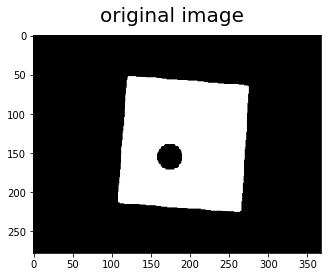

In [2]:
original_image = cv2.imread("images/Square-circle.png", 1)
plt.imshow(original_image)
plt.suptitle('original image', fontsize=20)
plt.show()

#### 3.1.2- dilated image whith square kernel : 

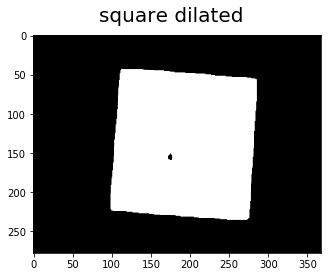

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
dilate = cv2.dilate(original_image, kernel, iterations = 1)
plt.imshow(dilate)
plt.suptitle('square dilated', fontsize=20)
plt.show()

#### 3.1.3- dilated image whith circle kernel :

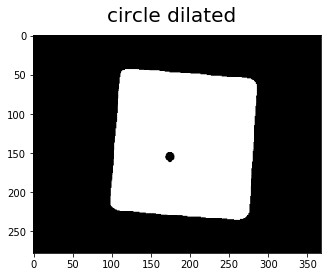

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
dilate = cv2.dilate(original_image, kernel, iterations = 1)
plt.imshow(dilate)
plt.suptitle('circle dilated', fontsize=20)
plt.show()

### 3.2- pepper noise reduction by dilation: 

#### 3.2.1- original image :

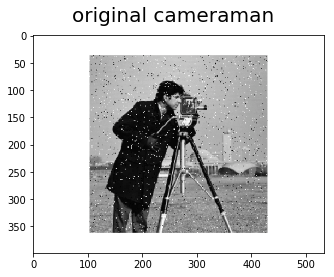

In [5]:
cameraman = cv2.imread("images/Cameraman.png", 1)
plt.imshow(cameraman)
plt.suptitle('original cameraman', fontsize=20)
plt.show()

#### 3.2.2- noise reducted image: 

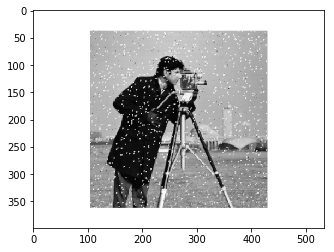

In [6]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
cameraman2 = cv2.dilate(cameraman, kernel2, iterations = 1)
plt.imshow(cameraman2)
plt.show()

### 3.3- edge detection with dilation :

the concept of edge detection with dilation is that : we have dealed that dilation make the contour increases so if we increase the outer contour thin  the original image minused from dilated image the remaining imagewill be just the outer contour 

#### 3.3.1 original image:

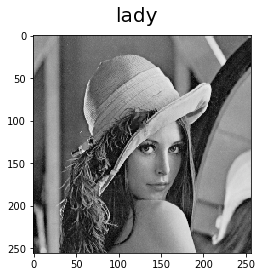

In [7]:
lady = cv2.imread("images/lady.png", 1)
plt.imshow(lady)
plt.suptitle('lady', fontsize=20)
plt.show()

#### 3.3.2 dilated image:

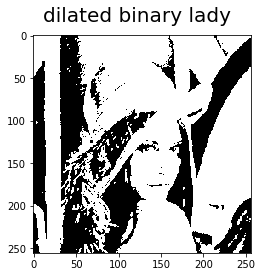

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
(thresh, lady1) = cv2.threshold(lady, 100, 255, cv2.THRESH_BINARY)
ladyd = cv2.dilate(lady1, kernel, iterations = 1)
plt.imshow(ladyd)
plt.suptitle('dilated binary lady', fontsize=20)
plt.show()

#### 3.3.3- edges (dilated - original):

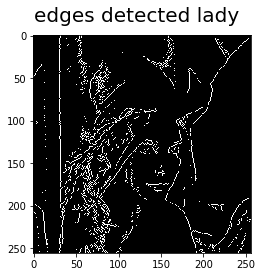

In [9]:
ladyf = ladyd - lady1
plt.imshow(ladyf)
plt.suptitle('edges detected lady', fontsize=20)
plt.show()

### 3.4- Erosion :

in a simple words, erosion try to decrease the size of shapes contour

#### 3.4.1- original image: 

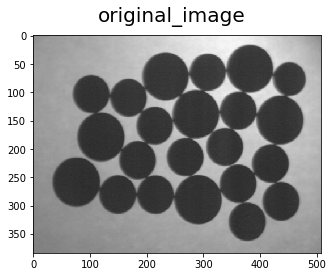

In [10]:
original_image = cv2.imread("images/Circle.png", 1)
plt.imshow(original_image)
plt.suptitle('original_image', fontsize=20)
plt.show()

#### 3.4.2- square erosied image: 

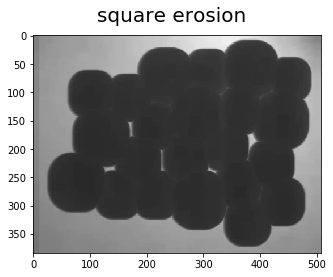

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
erosion = cv2.erode(original_image, kernel, iterations = 1)
plt.imshow(erosion)
plt.suptitle('square erosion', fontsize=20)
plt.show()

#### 3.4.3- square erosied image: 

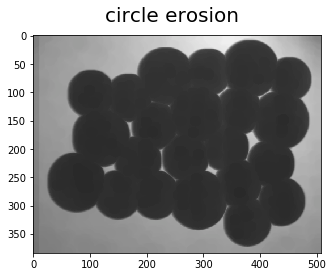

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
erosion = cv2.erode(original_image, kernel, iterations = 1)
plt.imshow(erosion)
plt.suptitle('circle erosion', fontsize=20)
plt.show()

### 3.5- display the circles distinctly :

#### 3.5.1- original image :  

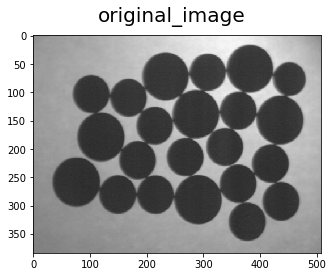

In [13]:
original_image = cv2.imread("images/circle.png", 1)
plt.imshow(original_image)
plt.suptitle('original_image', fontsize=20)
plt.show()

#### 3.5.2 - thresholded image: 

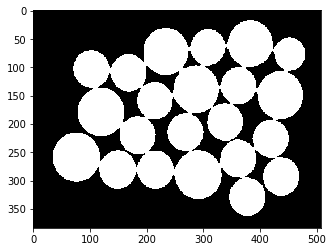

In [14]:
(thresh, circle1) = cv2.threshold(original_image, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(circle1)
plt.suptitle('', fontsize=20)
plt.show()

#### 3.5.3 - display the circles distinctly image: 

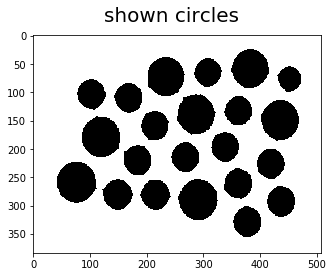

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
erosion = cv2.erode(circle1, kernel, iterations = 1)
(thresh, circle2) = cv2.threshold(erosion, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(circle2)
plt.suptitle('shown circles', fontsize=20)
plt.show()

### 3.6- erosion salt noise reduction : 

#### 3.6.1 - original image :

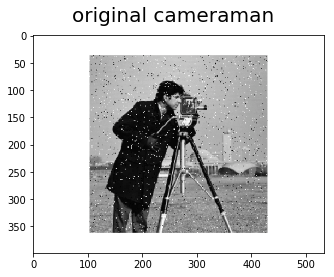

In [16]:
cameraman = cv2.imread("images/Cameraman.png", 1)
plt.imshow(cameraman)
plt.suptitle('original cameraman', fontsize=20)
plt.show()

#### 3.6.2 - noise reducted image :  

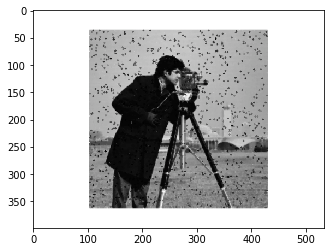

In [17]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cameraman2 = cv2.erode(cameraman, kernel2, iterations = 1)
plt.imshow(cameraman2)
plt.show()

### 3.7- Opening and Closing: 

The basic effect of an opening is like erosion in that it tends to remove some of the foreground (bright) pixels from the edges of regions of foreground pixels.

Closing is similar in some ways to dilation, in that it tends to enlarge the boundaries of the foreground regions in an image.

<h4>3.7.1 original image </h4>

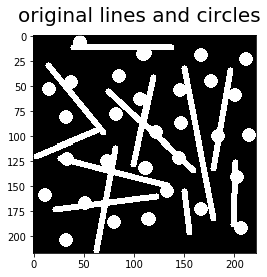

In [18]:
img = cv2.imread("images/Circle_and_Lines.png",0)
my_plot (img , 'original lines and circles' , 'gray')

<h4>3.7.2 extracted circles:</h4>

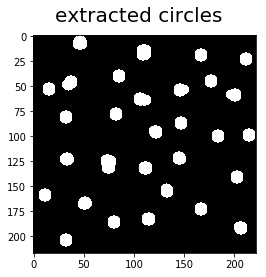

In [19]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
circles = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
my_plot(circles,"extracted circles", 'gray')

#### 3.7.3 extracted lines:

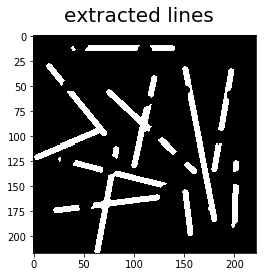

In [20]:
lines = img - circles
#removing white noise
kernel_lines = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
lines = cv2.morphologyEx(lines, cv2.MORPH_OPEN, kernel_lines)
kernel_lines = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
lines = cv2.morphologyEx(lines, cv2.MORPH_CLOSE, kernel_lines)
my_plot(lines , "extracted lines" , "gray")

#### 3.7.4 counting circles:

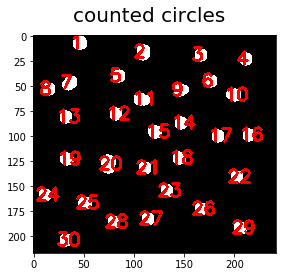

In [21]:
circles_stats = cv2.connectedComponentsWithStats(circles, 4, cv2.CV_32S)
circ_num = circles_stats[0]
# my_plot(circles_stats[1],"test","gray")
new_circles = np.copy(circles)
new_circles = cv2.cvtColor(new_circles,cv2.COLOR_GRAY2BGR)
new_circles =  np.append(new_circles, np.zeros((new_circles.shape[0],20,3),"uint8"), axis=1)
i_cir_counter = 0;
for cent in circles_stats[3]:
    i_cir_counter += 1
    if (i_cir_counter == 1):
        continue
    x_co = int(cent[0])
    y_co = int(cent [1])
#     cv2.circle(new_circles, (x_co , y_co), 3, (100, 100, 100), 1)
    cv2.putText(new_circles,str(i_cir_counter - 1), (x_co-9, y_co+6),cv2.FONT_HERSHEY_SIMPLEX,  0.6, (0,0,255), 2)
my_plot(cv2.cvtColor(new_circles,cv2.COLOR_BGR2RGB) , "counted circles")

#### 3.7.5 counting lines:

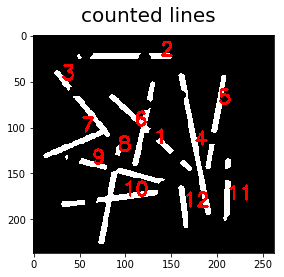

In [22]:
# adding black areas 
new_lines = cv2.cvtColor(lines,cv2.COLOR_GRAY2BGR)
new_lines =  np.append(np.zeros((new_lines.shape[0],10,3),"uint8") , new_lines, axis=1)
new_lines =  np.append(new_lines, np.zeros((new_lines.shape[0],30,3),"uint8"), axis=1)
new_lines =  np.append(new_lines, np.zeros((10 ,new_lines.shape[1],3),"uint8"), axis=0)
new_lines =  np.append(np.zeros((10 ,new_lines.shape[1],3),"uint8"), new_lines, axis=0)
#--------------------------------------------------------------------------------------
lines_stats = cv2.connectedComponentsWithStats(cv2.cvtColor(new_lines,cv2.COLOR_BGR2GRAY), 4, cv2.CV_32S)
i_cir_counter = 0;
exclude_co = [(49, 23)  , (88, 22)  , (128, 60)  , (142, 119)  , (191, 131)  , (36, 132)  , (211, 139)  , (166, 141)  , (43, 182)]
for cent in lines_stats[3]:
    i_cir_counter += 1
    x_co = int(cent[0])
    y_co = int(cent [1])
    if ((x_co , y_co) in exclude_co):
        i_cir_counter -= 1
    else:
        cv2.putText(new_lines,str(i_cir_counter), (x_co, y_co),cv2.FONT_HERSHEY_SIMPLEX,  0.7, (0,0,255), 2)
my_plot(cv2.cvtColor(new_lines,cv2.COLOR_BGR2RGB) , "counted lines")

### Q12. changing sky color:

#### Q12.1 original image:

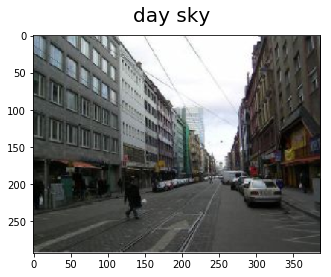

In [23]:
day = cv2.imread("images/daySky.png",1)
my_plot(cv2.cvtColor(day,cv2.COLOR_BGR2RGB), "day sky")

#### Q12.2 night sky:

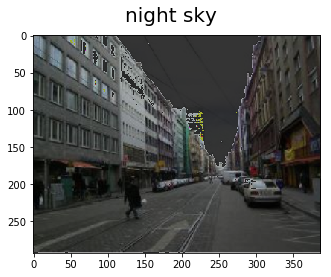

In [24]:
night = np.copy(day)
night[night[:,: , 2] >= 185] = 0
night[night >= 200] = 0
night = cv2.addWeighted(night,0.7,day,0.2,1)
my_plot(cv2.cvtColor(night,cv2.COLOR_BGR2RGB), "night sky")

<h3> Q13: Hilighting coins (a color for each category):</h2>

#### Q13.1 original image:

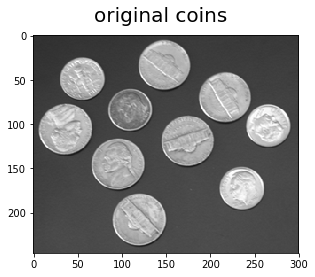

In [25]:
coins_orig = cv2.imread("images/coins.png",1)
my_plot(coins_orig, "original coins")

#### Q13.2 highlighting coins:

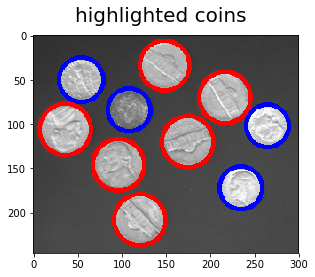

In [26]:
gray = cv2.cvtColor(coins_orig, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30,
                           minRadius=1, maxRadius=30)
# NOTE connected components with stats can be also used بس خلينا ننوع
if circles is not None:
    circles = np.uint16(np.around(circles))
    new_coins = np.copy(coins_orig)
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle outline
        radius = i[2]
#         print (radius)
        if(radius <= 25):
            cv2.circle(new_coins, center, radius, (0, 0, 255), 3)
        else:
            cv2.circle(new_coins, center, radius, (255, 0, 0), 3)
        
        
my_plot(new_coins, "highlighted coins")

#### Q13.3 another general coins:

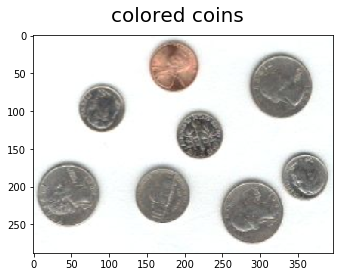

In [27]:
coins_orig = cv2.imread("images/coins_colored.png",1)
my_plot(cv2.cvtColor(coins_orig,cv2.COLOR_BGR2RGB), "colored coins")

#### Q13.2 highlighting coins:

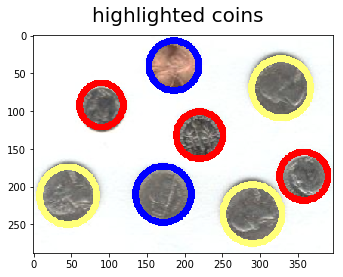

In [28]:
gray = cv2.cvtColor(coins_orig, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30,
                           minRadius=1, maxRadius=40)
if circles is not None:
    circles = np.uint16(np.around(circles))
    new_coins = np.copy(coins_orig)
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle outline
        radius = i[2]
#         print (radius)
        if(radius <= 32):
            cv2.circle(new_coins, center, radius, (0, 0, 255), 8)
        elif(radius <=37):
            cv2.circle(new_coins, center, radius, (255, 0, 0), 8)
        else:
            cv2.circle(new_coins, center, radius, (120, 255, 255), 8)
        
        
my_plot(cv2.cvtColor(new_coins,cv2.COLOR_BGR2RGB), "highlighted coins")